In [2]:
# 데이터 라이브러리
import pandas as pd

# tree와 regression 관련 라이브러리
from sklearn import tree
from sklearn.tree import export_text
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error 

# K-fold cross validation 관련 라이브러리
from sklearn.model_selection import KFold

# 임의로 데이터를 섞기위한 라이브러리(random shuffling)
from sklearn.utils import shuffle

# Iris data를 불러오기 위한 라이브러리
from sklearn.datasets import load_iris

In [3]:
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]

# Decision tree object 생성
clf = tree.DecisionTreeRegressor()

# training
clf = clf.fit(X, y)

# test data 예측
clf.predict([[1, 1]])

array([0.5])

In [4]:
# Iris data 불러오기
iris = load_iris()

# 데이터를 feature와 response로 분리
X_iris, y_iris = iris.data, iris.target

In [5]:
y_iris

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
ㅍ

In [11]:
# Decision tree object 생성

# tree의 depth를 미리 조정
#clf = tree.DecisionTreeClassifier(max_depth=2)

# pruning 방법으로 depth 조정
clf = tree.DecisionTreeClassifier(ccp_alpha=0.1)

# training
clf = clf.fit(X_iris, y_iris)

In [12]:
# test data 예측
clf.predict([[5.6, 2.4, 4.1, 1.1]])

array([1])

[Text(0.4, 0.8333333333333334, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

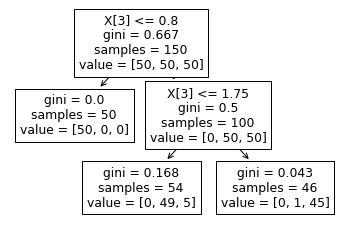

In [13]:
# tree 시각화 
tree.plot_tree(clf)

In [14]:
# tree 시각화
r = export_text(clf, feature_names=iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



In [15]:
# 데이터 임의로 섞기(random shuffling)
X_iris, y_iris = shuffle(X_iris, y_iris, random_state=0)

In [20]:
y_iris

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1,
       1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2,
       1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [21]:
# training set, test set 구분
X_train, X_test = X_iris[:120], X_iris[120:]
y_train, y_test = y_iris[:120], y_iris[120:]

In [22]:
for n_trees in [1, 10, 50, 100]: 
  # boosting object 생성 및 training
  clf = GradientBoostingClassifier(n_estimators=n_trees, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train) 

  # test data 예측값
  print(clf.score(X_test, y_test))

0.9
0.9333333333333333
0.9333333333333333
0.9333333333333333


In [23]:
# 데이터 loading
from google.colab import drive
drive.mount('/content/drive')

hitters = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/Hitters.csv", index_col=0)

# 데이터 임의로 섞기(random shuffling)
hitters = shuffle(hitters, random_state=0)

Mounted at /content/drive


In [24]:
hitters = hitters.dropna()

In [29]:
# k-fold CV의 fold 수 지정
n_fold = 5

for t_param in ("sqrt", 5):
  print("Number of features: ", t_param)
  kf = KFold(n_splits=n_fold) 
  idx = 1

  sum_val_mse = 0
  for train, val in kf.split(hitters):
    print("Fold: #", idx)

    # training set의 feature와 response 분리
    train_X = hitters.iloc[train][["Hits", "HmRun", "Runs", "Walks", "Years"]]
    train_y = hitters.iloc[train]["Salary"]

    # validation set의 feature와 response 분리
    val_X = hitters.iloc[val][["Hits", "HmRun", "Runs", "Walks", "Years"]]
    val_y = hitters.iloc[val]["Salary"]

    # Random forests object 생성
    regr = RandomForestRegressor(max_depth=3, max_features=t_param, random_state=0)

    # training set을 이용하여 적합
    regr.fit(train_X, train_y)

    # validation set을 이용하여 예측
    val_y_pred = regr.predict(val_X)
    
    # validation MSE
    val_mse = mean_squared_error(val_y, val_y_pred)
    print("Validation MSE: %.3f" % val_mse)

    # validation MSE 합계
    sum_val_mse += val_mse

    print("------------------------------")
    idx+=1
  print("Average Validation MSE: %.3f" % (sum_val_mse / n_fold))
  print("******************************")

Number of features:  sqrt
Fold: # 1
Validation MSE: 79710.019
------------------------------
Fold: # 2
Validation MSE: 95799.468
------------------------------
Fold: # 3
Validation MSE: 138658.705
------------------------------
Fold: # 4
Validation MSE: 91889.052
------------------------------
Fold: # 5
Validation MSE: 155939.570
------------------------------
Average Validation MSE: 112399.363
******************************
Number of features:  5
Fold: # 1
Validation MSE: 61562.944
------------------------------
Fold: # 2
Validation MSE: 87234.291
------------------------------
Fold: # 3
Validation MSE: 131675.764
------------------------------
Fold: # 4
Validation MSE: 85842.897
------------------------------
Fold: # 5
Validation MSE: 161507.516
------------------------------
Average Validation MSE: 105564.682
******************************
